Shape: (768, 10)

Missing Values:



Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64


Description:



,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000



Without PCA (Original Features)
MSE: 9.165678879847071
R²: 0.9120649811032968

Number of features before PCA: 8
Number of components after PCA: 5

With PCA (Reduced Dimensions)
MSE: 13.54316364048642
R²: 0.8700676331498112


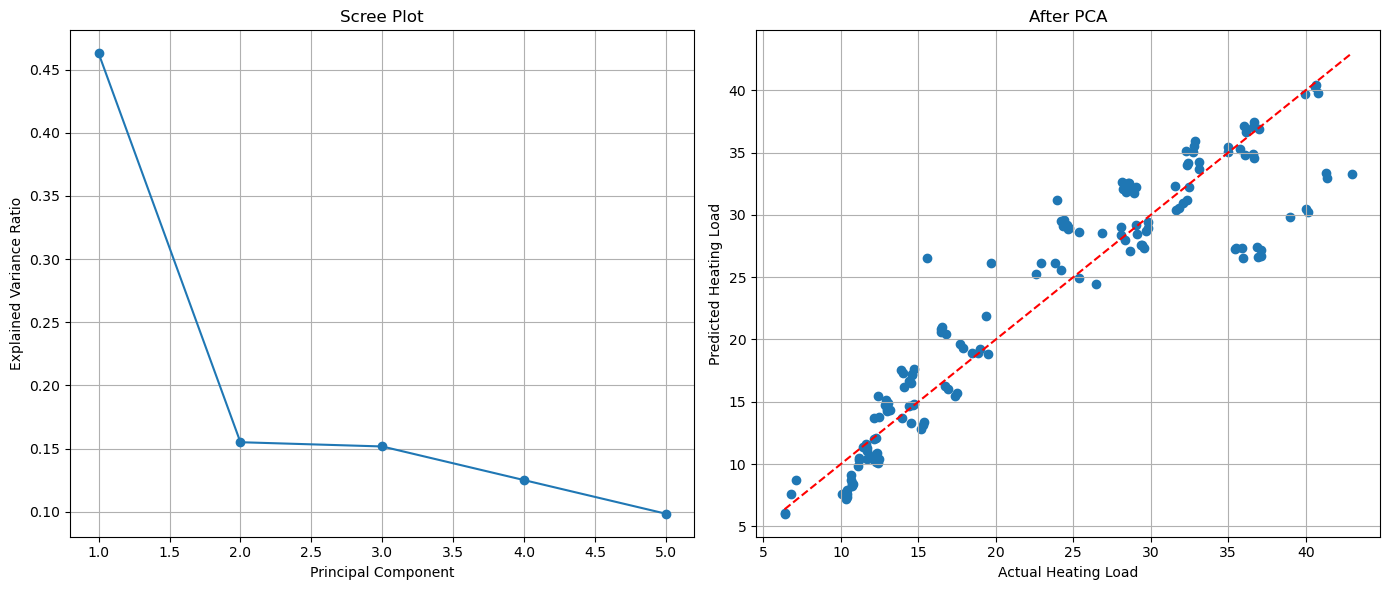

In [14]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_excel(r"C:\Users\annap\OneDrive\Documents\data science folder\ENB2012_data.xlsx")
cols = ['Relative_Compactness','Surface_Area','Wall_Area','Roof_Area','Overall_Height',
        'Orientation','Glazing_Area','Glazing_Area_Distribution','Heating_Load','Cooling_Load']
df.columns = cols

print("Shape:", df.shape)
print("\nMissing Values:\n")
display(df.isnull().sum())
print("\nDescription:\n")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
display(df.describe())


X = df.drop(["Heating_Load","Cooling_Load"], axis=1)
y = df["Heating_Load"]  


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
model_orig = LinearRegression()
model_orig.fit(X_train, y_train)
y_pred_orig = model_orig.predict(X_test)

print("\nWithout PCA (Original Features)")
print("MSE:", mean_squared_error(y_test, y_pred_orig))
print("R²:", r2_score(y_test, y_pred_orig))


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(0.95)
X_pca = pca.fit_transform(X_scaled)

print("\nNumber of features before PCA:", X.shape[1])
print("Number of components after PCA:", X_pca.shape[1])


X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42)


model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = model_pca.predict(X_test_pca)

print("\nWith PCA (Reduced Dimensions)")
print("MSE:", mean_squared_error(y_test_pca, y_pred_pca))
print("R²:", r2_score(y_test_pca, y_pred_pca))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].plot(range(1, len(pca.explained_variance_ratio_) + 1),
             pca.explained_variance_ratio_, marker='o')
axes[0].set_title('Scree Plot')
axes[0].set_xlabel('Principal Component')
axes[0].set_ylabel('Variance Ratio')
axes[0].grid(True)


axes[1].scatter(y_test, y_pred_pca)
axes[1].plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], 'r--')
axes[1].set_title('After PCA')
axes[1].set_xlabel('Actual Heating Load')
axes[1].set_ylabel('Predicted Heating Load')
axes[1].grid(True)

plt.tight_layout()
plt.show()

